In [51]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh as e

I'll be doing PCA and KPCA on iris, make_moons and the breast cancer data sets

In [75]:
def kernel_pca(data, sigma, d):
    mat = squareform(pdist(data,"sqeuclidean"))
    K = np.exp(-mat/(2*sigma**2))
    N = K.shape[0]
    O = np.ones((N,N))/N
    ktilde = K - O@K - K@O + O@K@O
    lam, u = e(ktilde)
    lam,u = lam[::-1],u[:,::-1]
    return u[:,:d]
    

In [76]:
irisX, irisy = datasets.load_iris(return_X_y=True)
n,d = irisX.shape
cancerX, cancery = datasets.load_breast_cancer(return_X_y=True)

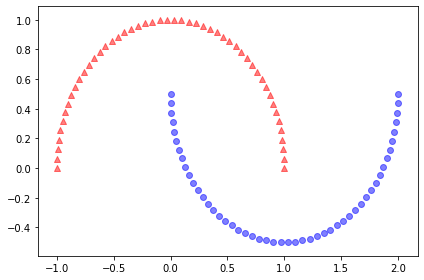

In [77]:
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

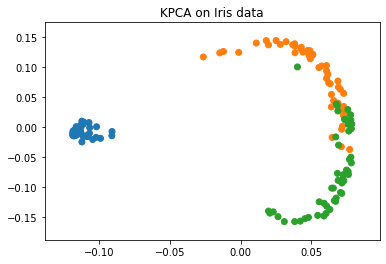

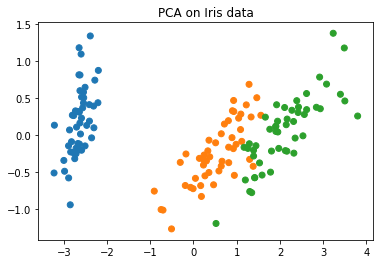

In [78]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
Xiris = kpca.fit_transform(irisX)
pca = PCA()
irispca = pca.fit_transform(irisX)
colors = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
Xiris = kernel_pca(irisX,1.5,2)
plt.scatter(Xiris[:,0],Xiris[:,1],color = [colors[i] for i in irisy])
plt.title("KPCA on Iris data")
plt.show()
plt.scatter(irispca[:,0],irispca[:,1],color = [colors[i] for i in irisy])
plt.title("PCA on Iris data")
plt.show()

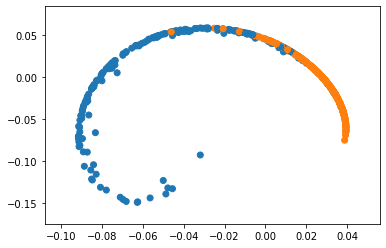

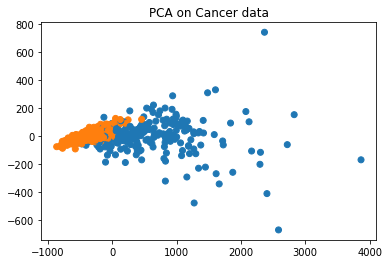

In [82]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=.00000001)
Xcan = kpca.fit_transform(cancerX)
pca = PCA()
canpca = pca.fit_transform(cancerX)
colors = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]


Xcan = kernel_pca(cancerX,900,2)
plt.scatter(Xcan[:,0],Xcan[:,1],color = [colors[i] for i in cancery])
# plt.title("KPCA on Cancer data")
plt.show()
plt.scatter(canpca[:,0],canpca[:,1],color = [colors[i] for i in cancery])
plt.title("PCA on Cancer data")
plt.show()

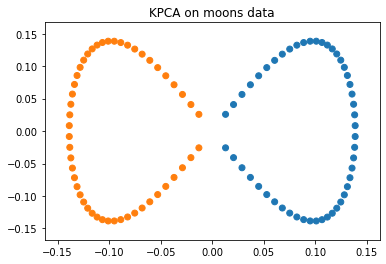

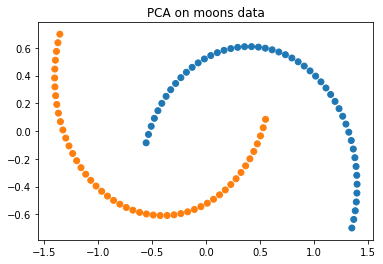

In [87]:
kpca = KernelPCA(kernel="rbf")
Xm = kpca.fit_transform(X)
pca = PCA()
mpca = pca.fit_transform(X)
colors = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
Xm = kernel_pca(X,.1,2)
plt.scatter(Xm[:,0],Xm[:,1],color = [colors[i] for i in y])
plt.title("KPCA on moons data")
plt.show()
plt.scatter(mpca[:,0],mpca[:,1],color = [colors[i] for i in y])
plt.title("PCA on moons data")
plt.show()